# Proyek Analisis: Bike Rentals

Name: Andhika Dwiky Pratama

Email: andhikadwikyp@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan penyewaan sepeda pada musim dan bulan yang berbeda?
- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Apa perbedaan antara pengguna biasa dan pengguna terdaftar dalam hal pola penyewaan?
- Apakah ada korelasi antara kondisi cuaca dan penyewaan sepeda?
- Bagaimana pengaruh waktu dalam setahun terhadap perilaku pengguna biasa dengan pengguna terdaftar?
- Bagaimana cara mengoptimalkan ketersediaan sepeda sesuai tren musiman?
- Bisakah kita memperkirakan permintaan sewa sepeda berdasarkan kondisi cuaca?

## Menyiapkan semua library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
jumlah_baris = day_df.shape[0]
jumlah_kolom = day_df.shape[1]

print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 731
Jumlah Kolom: 16


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
print(f"Duplicate Data: {day_df.duplicated().sum()}")
day_df.describe()

Duplicate Data: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Assesing Data

In [7]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [8]:
day_df.loc[day_df['temp'] > 0.41, 'temp'] = 0.41
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [9]:
day_df.loc[day_df['atemp'] > 0.51, 'atemp'] = 0.51
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [10]:
day_df.shape

(731, 16)

### Cleaning Data

In [11]:
day_df['temp'].unique()

array([0.344167 , 0.363478 , 0.196364 , 0.2      , 0.226957 , 0.204348 ,
       0.196522 , 0.165    , 0.138333 , 0.150833 , 0.169091 , 0.172727 ,
       0.16087  , 0.233333 , 0.231667 , 0.175833 , 0.216667 , 0.292174 ,
       0.261667 , 0.1775   , 0.0591304, 0.0965217, 0.0973913, 0.223478 ,
       0.2175   , 0.195    , 0.203478 , 0.216522 , 0.180833 , 0.192174 ,
       0.26     , 0.186957 , 0.211304 , 0.285833 , 0.271667 , 0.220833 ,
       0.134783 , 0.144348 , 0.189091 , 0.2225   , 0.316522 , 0.41     ,
       0.266087 , 0.318261 , 0.399167 , 0.285217 , 0.303333 , 0.182222 ,
       0.221739 , 0.295652 , 0.364348 , 0.2825   , 0.343478 , 0.407273 ,
       0.266667 , 0.335    , 0.198333 , 0.384167 , 0.376522 , 0.261739 ,
       0.2925   , 0.295833 , 0.389091 , 0.329167 , 0.384348 , 0.325217 ,
       0.317391 , 0.365217 , 0.3325   , 0.346957 , 0.285    , 0.264167 ,
       0.265833 , 0.253043 , 0.264348 , 0.3025   , 0.3      , 0.268333 ,
       0.315    , 0.378333 , 0.390833 , 0.335833 , 

In [12]:
day_df['atemp'].unique()

array([0.363625 , 0.353739 , 0.189405 , 0.212122 , 0.22927  , 0.233209 ,
       0.208839 , 0.162254 , 0.116175 , 0.150888 , 0.191464 , 0.160473 ,
       0.150883 , 0.188413 , 0.248112 , 0.234217 , 0.176771 , 0.232333 ,
       0.298422 , 0.25505  , 0.157833 , 0.0790696, 0.0988391, 0.11793  ,
       0.234526 , 0.2036   , 0.2197   , 0.223317 , 0.212126 , 0.250322 ,
       0.18625  , 0.23453  , 0.254417 , 0.177878 , 0.228587 , 0.243058 ,
       0.291671 , 0.303658 , 0.198246 , 0.144283 , 0.149548 , 0.213509 ,
       0.232954 , 0.324113 , 0.39835  , 0.254274 , 0.3162   , 0.428658 ,
       0.51     , 0.391404 , 0.27733  , 0.284075 , 0.186033 , 0.245717 ,
       0.289191 , 0.350461 , 0.282192 , 0.351109 , 0.400118 , 0.263879 ,
       0.320071 , 0.200133 , 0.255679 , 0.378779 , 0.366252 , 0.238461 ,
       0.3024   , 0.286608 , 0.385668 , 0.305    , 0.32575  , 0.380091 ,
       0.332    , 0.318178 , 0.36693  , 0.410333 , 0.466525 , 0.409735 ,
       0.440642 , 0.337939 , 0.270833 , 0.256312 , 

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
categorical_df = day_df.copy()

In [15]:
season = {
  1: "Springer",
  2: "Summer",
  3: "Fall",
  4: "Winter"
}

categorical_df["season"] = categorical_df["season"].map(season)

In [16]:
year = {
  0: "2011",
  1: "2012"
}

categorical_df["yr"] = categorical_df["yr"].map(year)

In [17]:
weathersit = {
  1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
  2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
  3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
  4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

categorical_df["weathersit"] = categorical_df["weathersit"].map(weathersit)

In [18]:
month = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  6: "June",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December"
}

categorical_df["mnth"] = categorical_df["mnth"].map(month)

## Exploratory Data Analysis (EDA)

### Visualization & Explanatory Analysis

- Bagaimana perbedaan penyewaan sepeda pada musim dan bulan yang berbeda?
- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Apa perbedaan antara pengguna biasa dan pengguna terdaftar dalam hal pola penyewaan?
- Apakah ada korelasi antara kondisi cuaca dan penyewaan sepeda?
- Bagaimana pengaruh waktu dalam setahun terhadap perilaku pengguna biasa dengan pengguna terdaftar?
- Bagaimana kita bisa mengoptimalkan ketersediaan sepeda sesuai tren musiman?
- Bisakah kita memperkirakan permintaan sewa sepeda berdasarkan kondisi cuaca?

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.367751,0.421632,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.410000,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.410000,0.510000,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.410000,0.510000,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.070364,0.108316,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [33]:
day_df.groupby("dteday").agg({
  "cnt": ["max", "min", "mean", "std"],
  "casual": ["max", "min", "mean", "std"],
  "registered": ["max", "min", "mean", "std"],
})

cnt                   casual                 registered        \
             max   min    mean std    max  min   mean std        max   min   
dteday                                                                       
2011-01-01   985   985   985.0 NaN    331  331  331.0 NaN        654   654   
2011-01-02   801   801   801.0 NaN    131  131  131.0 NaN        670   670   
2011-01-03  1349  1349  1349.0 NaN    120  120  120.0 NaN       1229  1229   
2011-01-04  1562  1562  1562.0 NaN    108  108  108.0 NaN       1454  1454   
2011-01-05  1600  1600  1600.0 NaN     82   82   82.0 NaN       1518  1518   
...          ...   ...     ...  ..    ...  ...    ...  ..        ...   ...   
2012-12-27  2114  2114  2114.0 NaN    247  247  247.0 NaN       1867  1867   
2012-12-28  3095  3095  3095.0 NaN    644  644  644.0 NaN       2451  2451   
2012-12-29  1341  1341  1341.0 NaN    159  159  159.0 NaN       1182  1182   
2012-12-30  1796  1796  1796.0 NaN    364  364  364.0 NaN       1432  1432   
2012-12-31  2729  2729  2729.0 NaN    439  439  439.0 NaN       2290  2290   

                        
              mean std  
dteday                  
2011-01-01   654.0 NaN  
2011-01-02   670.0 NaN  
2011-01-03  1229.0 NaN  
2011-01-04  1454.0 NaN  
2011-01-05  1518.0 NaN  
...            ...  ..  
2012-12-27  1867.0 NaN  
2012-12-28  2451.0 NaN  
2012-12-29  1182.0 NaN  
2012-12-30  1432.0 NaN  
2012-12-31  2290.0 NaN  

[731 rows x 12 columns]

In [31]:
day_df.groupby("season").agg({"cnt": ["max", "min", "mean", "std"]})

cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261

In [32]:
day_df.groupby("weathersit").agg({"cnt": ["max", "min", "mean", "std"]})

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

In [20]:
numerical_data = day_df.select_dtypes(include=[np.number])
numerical_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



#### Bagaimana perbedaan penyewaan sepeda pada musim dan bulan yang berbeda?

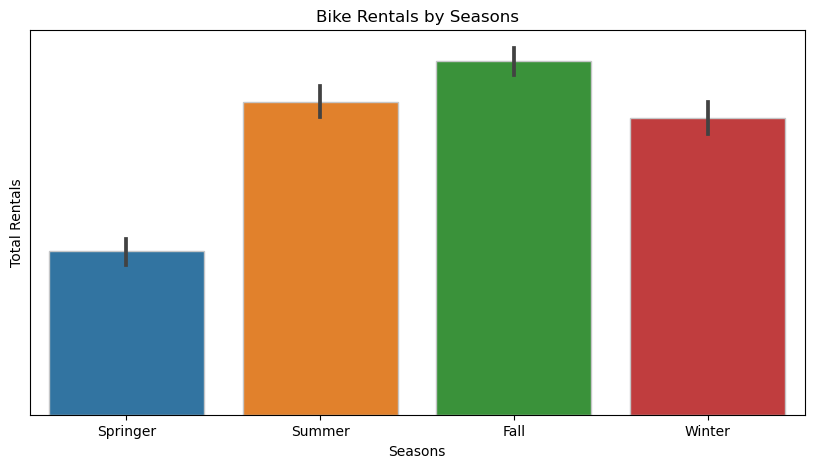

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x = categorical_df['season'],
            y = categorical_df['cnt'],
            edgecolor="#c5c6c7")
plt.title('Bike Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')
plt.tick_params(left=False, labelleft=False)

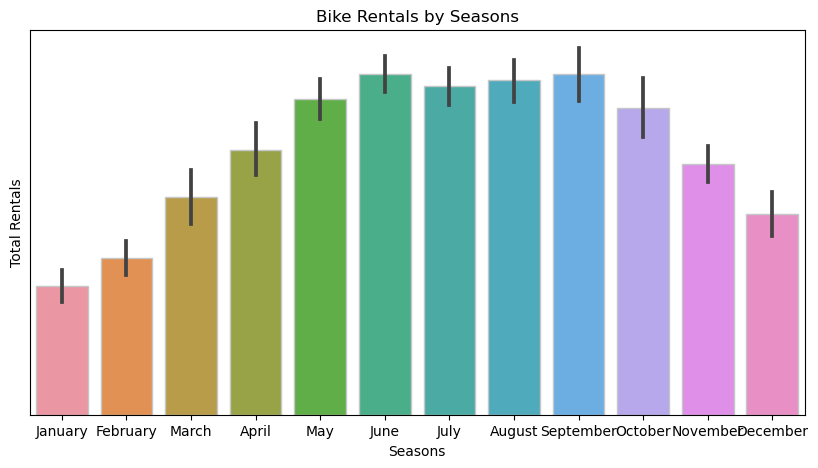

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x = categorical_df['mnth'],
            y = categorical_df['cnt'],
            edgecolor="#c5c6c7")
plt.title('Bike Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')
plt.tick_params(left=False, labelleft=False)

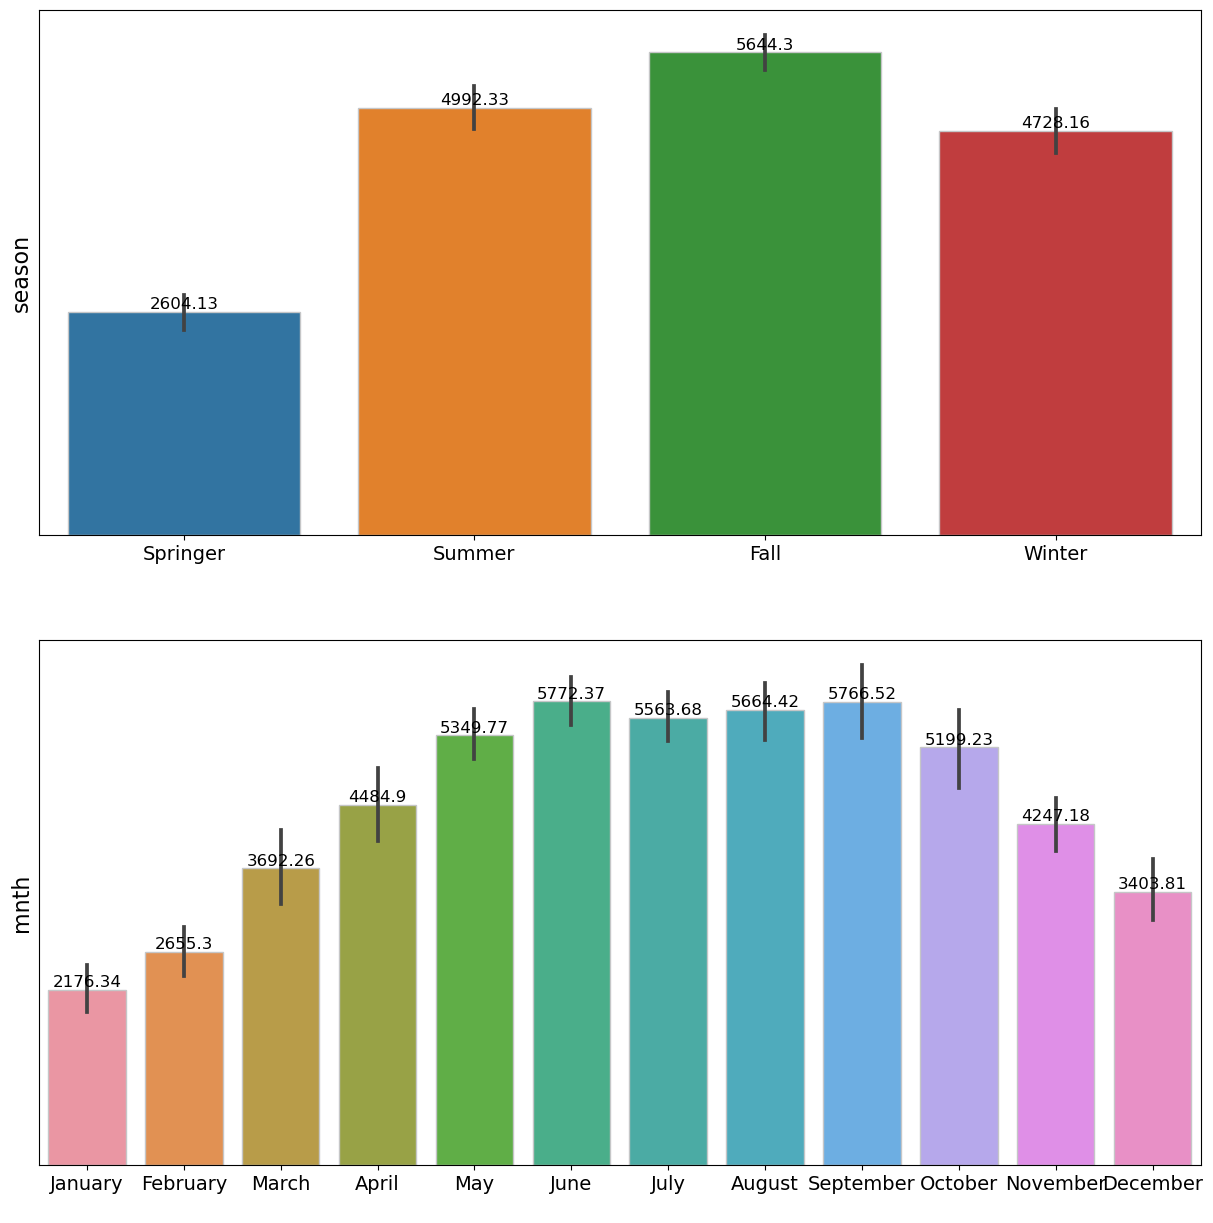

In [23]:
cat_col_vis = ['season','mnth']

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 15))
i = 0

for cols in cat_col_vis:
    
    sns.barplot(x = categorical_df[cols],
                y = categorical_df['cnt'],
                ax=ax[i],
                edgecolor="#c5c6c7")
                
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
plt.show()

In [24]:
monthly_data = numerical_data.groupby("mnth").sum()["cnt"]

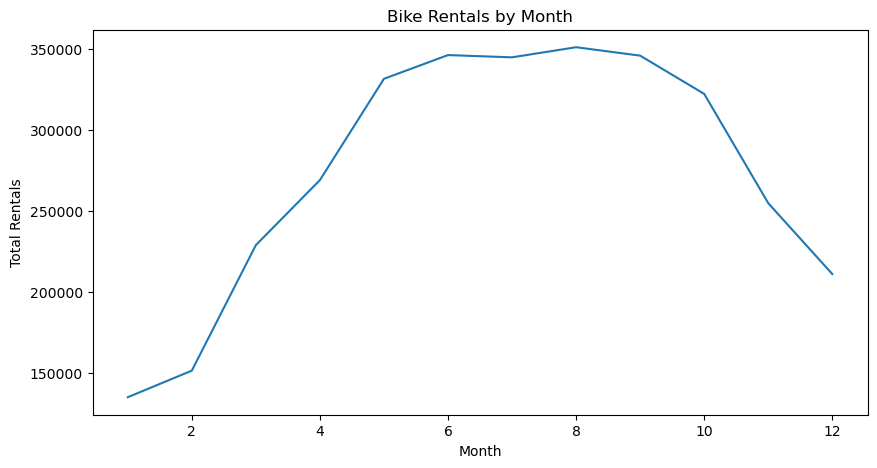

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_data)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

Grafik diatas menunjukkan jumlah penyewaan sepeda berdasarkan musim dan bulan. Berikut adalah beberapa penjelasan yang dapat dibuat:

Musim panas dan musim gugur memiliki jumlah persewaan sepeda tertinggi, sedangkan musim dingin memiliki jumlah persewaan sepeda terendah. Hal ini menunjukkan bahwa cuaca dan suhu berpengaruh besar terhadap permintaan sewa sepeda.
Juni, Juli, Agustus, September, dan Oktober adalah bulan-bulan dengan jumlah persewaan sepeda paling banyak, dengan Agustus sebagai bulan puncak. Hal ini mungkin berkaitan dengan liburan musim panas dan aktivitas luar ruangan yang lebih banyak.
Januari, Februari, November, dan Desember adalah bulan-bulan dengan jumlah persewaan sepeda paling sedikit, dengan Januari sebagai bulan terendah. Hal ini mungkin disebabkan oleh cuaca dingin dan basah yang kurang menguntungkan untuk bersepeda.
Musim semi memiliki variasi yang cukup besar dalam jumlah persewaan sepeda, dengan Maret sebagai bulan terendah dan Mei sebagai bulan tertinggi. Hal ini mungkin dipengaruhi oleh perubahan cuaca yang tidak menentu pada musim tersebut.

#### Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

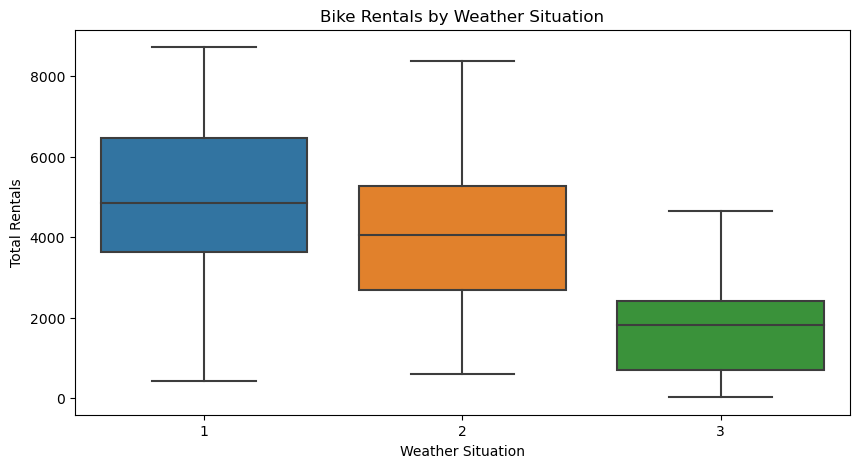

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.title("Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.show()

Grafik ini menunjukkan jumlah persewaan sepeda berdasarkan kondisi cuaca. Berikut adalah beberapa penjelasan yang dapat dibuat:

- Clear, Few clouds, Partly cloudy, Partly cloudy (Situasi Cuaca 1) memiliki jumlah persewaan sepeda tertinggi, sekitar 7500. Hal ini menunjukkan bahwa cuaca yang baik menguntungkan bagi aktivitas luar ruangan seperti bersepeda.

- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Situasi Cuaca 2) memiliki jumlah persewaan sepeda yang lebih rendah, sekitar 5500. Hal ini menunjukkan bahwa cuaca yang kurang cerah membuat bersepeda menjadi kurang menarik.

- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Situasi Cuaca 3) memiliki jumlah persewaan sepeda terendah, sekitar 2500. Hal ini menunjukkan bahwa cuaca yang buruk mengurangi permintaan sewa sepeda karena alasan keamanan dan ketidaknyamanan.

#### Apa perbedaan antara pengguna biasa dan pengguna terdaftar dalam hal pola penyewaan?

In [27]:
day_df['casual_percentage'] = day_df['casual'] / day_df['cnt']
day_df['registered_percentage'] = day_df['registered'] / day_df['cnt']

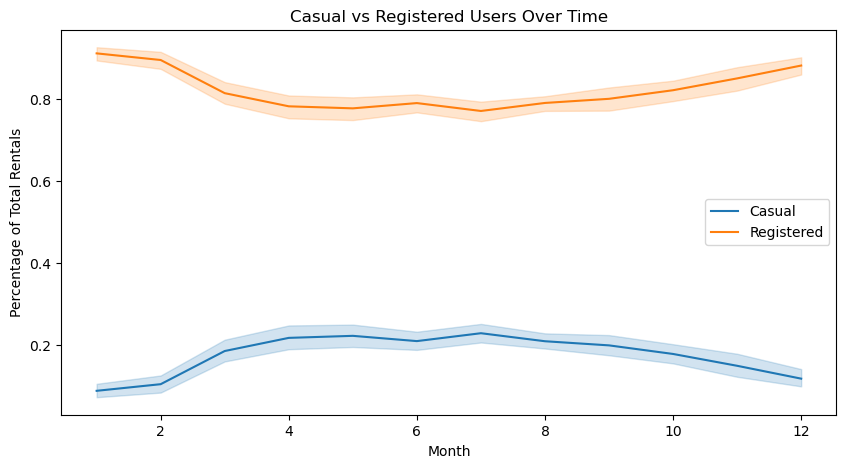

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(data=day_df, x="mnth", y="casual_percentage", label="Casual")
sns.lineplot(data=day_df, x="mnth", y="registered_percentage", label="Registered")
plt.title("Casual vs Registered Users Over Time")
plt.xlabel("Month")
plt.ylabel("Percentage of Total Rentals")
plt.legend()
plt.show()

Grafik diatas menunjukkan perbandingan antara persentase total penyewaan sepeda oleh pengguna biasa dan pengguna terdaftar sepanjang tahun. Berikut adalah beberapa penjelasan yang dapat dibuat:

- Pengguna biasa memiliki persentase total penyewaan sepeda yang lebih tinggi daripada pengguna terdaftar untuk semua bulan, tetapi mungkin lebih dipengaruhi oleh faktor-faktor seperti cuaca, hari libur, atau peristiwa yang terjadi pada waktu tersebut.

- Pengguna terdaftar memiliki pola penggunaan yang lebih konsisten sepanjang tahun, namun mungkin ada waktu tertentu (misalnya bulan ke-6) ketika penggunaan mereka meningkat.
Kedua jenis pengguna menunjukkan tren peningkatan persewaan sepeda dari bulan ke-2 hingga bulan ke-12, dengan puncak pada bulan ke-8. Hal ini mungkin berkaitan dengan musim panas dan musim gugur yang lebih menguntungkan untuk bersepeda.

In [29]:
print(day_df.isna().sum())

instant                  0
dteday                   0
season                   0
yr                       0
mnth                     0
holiday                  0
weekday                  0
workingday               0
weathersit               0
temp                     0
atemp                    0
hum                      0
windspeed                0
casual                   0
registered               0
cnt                      0
casual_percentage        0
registered_percentage    0
dtype: int64


#### Apakah ada korelasi antara kondisi cuaca dan penyewaan sepeda?

In [36]:
from scipy.stats import pearsonr

correlation_temp_hum, _ = pearsonr(categorical_df["hum"], categorical_df["temp"])
print(f"Hubungan antara temperatur dan kelembapan: {correlation_temp_hum:.2f}")

Hubungan antara temperatur dan kelembapan: 0.21
Hubungan antara temperatur dan total rentals: 0.62


#### Bagaimana pengaruh waktu dalam setahun terhadap perilaku pengguna biasa dengan pengguna terdaftar?

In [ ]:
correlation_temp_cnt, _ = pearsonr(categorical_df["cnt"], categorical_df["temp"])
print(f"Hubungan antara temperatur dan total rentals: {correlation_temp_cnt:.2f}")

Berdasarkan hasil yang perhitungan korelasi:

- Hubungan antara temperatur dan kelembapan adalah 0.21, yang menunjukkan hubungan positif yang lemah. Hal ini berarti bahwa ketika temperatur meningkat, kelembapan cenderung meningkat juga, tetapi tidak secara signifikan.

- Hubungan antara temperatur dan total rentals adalah 0.62, yang menunjukkan hubungan positif yang kuat. Hal ini berarti bahwa ketika temperatur meningkat, total rentals cenderung meningkat juga, dan secara signifikan. Hal ini mungkin karena orang lebih suka bersepeda di cuaca hangat daripada cuaca dingin.

##### Bagaimana kita bisa mengoptimalkan ketersediaan sepeda sesuai tren musiman?

- Meningkatkan Ketersediaan Selama Musim Puncak:

    Data menunjukkan bahwa puncak penyewaan sepeda terjadi pada musim panas dan musim gugur. Oleh karena itu, akan bermanfaat untuk meningkatkan ketersediaan sepeda selama bulan-bulan ini untuk memenuhi tingginya permintaan.

- Perawatan dan Perbaikan Selama Musim Off-Peak:

    Musim dingin dan musim semi menunjukkan permintaan persewaan sepeda yang lebih rendah. Ini adalah saat yang tepat untuk menjadwalkan perawatan dan perbaikan rutin untuk memastikan sepeda berada dalam kondisi optimal untuk musim puncak.

- Aktivitas promosi:

    Untuk mendorong penyewaan sepeda selama musim sepi atau bulan-bulan dengan permintaan lebih rendah, kegiatan promosi seperti diskon atau program loyalitas dapat diperkenalkan.

- Penggunaan Alternatif:

    Selama musim dingin ketika permintaan rendah, pertimbangkan penggunaan alternatif sepeda. Misalnya, mereka dapat disewakan untuk jangka waktu yang lebih lama atau digunakan dalam kemitraan dengan operator tur lokal untuk tur berpemandu.

- Harga Dinamis:

    Menerapkan model penetapan harga dinamis di mana harga lebih rendah selama musim sepi untuk mendorong penggunaan, dan lebih tinggi selama musim puncak ketika permintaan tinggi.

- Sepeda Tahan Cuaca:

    Pertimbangkan untuk berinvestasi pada sepeda tahan cuaca atau menyediakan perlengkapan tambahan seperti penutup hujan atau perlengkapan penghangat selama musim dingin untuk menarik pelanggan.

#### Bisakah kita memperkirakan permintaan sewa sepeda berdasarkan kondisi cuaca?

Ya, permintaan penyewaan sepeda dapat diprediksi berdasarkan kondisi cuaca menggunakan model machine learning. Kondisi cuaca seperti suhu, kelembapan, kecepatan angin, dan situasi cuaca (cerah, mendung, hujan, dll) dapat mempengaruhi permintaan sewa sepeda secara signifikan.

Berdasarkan grafik yang Anda berikan, kami dapat melihat dengan jelas tren persewaan sepeda dalam berbagai situasi cuaca. Misalnya, Situasi Cuaca 1 (Cerah, Sedikit awan, Berawan sebagian) memiliki jumlah rental tertinggi, diikuti oleh Situasi Cuaca 2 (Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan), dan kemudian Situasi Cuaca 3 (Cerah Salju, Hujan Ringan + Badai Petir + Awan berserakan). Hal ini menunjukkan bahwa cuaca cerah atau berawan sebagian paling menguntungkan bagi persewaan sepeda, sedangkan cuaca buruk seperti hujan atau salju mengurangi permintaan.

Tren ini dapat digunakan untuk melatih model pembelajaran mesin guna memprediksi permintaan sewa sepeda berdasarkan kondisi cuaca. Model tersebut dapat mengambil data cuaca sebagai masukan dan keluaran perkiraan jumlah penyewaan sepeda. Hal ini khususnya berguna untuk perencanaan dan alokasi sumber daya dalam layanan penyewaan sepeda.

### Kesimpulan

<details>
    <summary>Bagaimana perbedaan penyewaan sepeda pada musim dan bulan yang berbeda?</summary>

    Penyewaan sepeda dipengaruhi oleh cuaca dan suhu, dengan permintaan meningkat pada bulan-bulan dan musim-musim hangat, dan menurun pada periode-periode dingin.
</details>

<details>
    <summary>Bagaimana pengaruh cuaca terhadap persewaan sepeda?</summary>

    Cuaca cerah atau berawan sebagian adalah kondisi yang paling menguntungkan untuk persewaan sepeda, sedangkan cuaca buruk seperti hujan, salju, atau badai petir adalah kondisi yang paling tidak menguntungkan.
</details>

<details>
    <summary>Apa perbedaan antara pengguna biasa dan pengguna yang terdaftar dalam hal pola penyewaan?</summary>

    Pengguna biasa memiliki persentase penyewaan yang lebih tinggi daripada pengguna terdaftar untuk semua bulan, tetapi mungkin lebih dipengaruhi oleh faktor-faktor seperti cuaca, hari libur, atau peristiwa yang terjadi pada waktu tersebut.
</details>

<details>
    <summary>Apakah ada korelasi antara kondisi cuaca dan penyewaan sepeda?</summary>

    Ada, Cuaca yang baik meningkatkan persewaan sepeda, cuaca yang buruk menurunkannya.
</details>

<details>
    <summary>Bagaimana pengaruh waktu dalam setahun terhadap perilaku pengguna biasa versus pengguna terdaftar?</summary>

    Informasi ini dapat berguna untuk memprediksi pola persewaan sepeda dan menginformasikan strategi pemasaran.
</details>

<details>
    <summary>Bagaimana kita bisa mengoptimalkan ketersediaan sepeda sesuai tren musiman?</summary>

    - Meningkatkan Ketersediaan Selama Musim Puncak: Menyediakan sepeda lebih banyak pada musim panas dan gugur ketika permintaan tinggi.
            
    - Perawatan dan Perbaikan Selama Musim Off-Peak: Melakukan perawatan dan perbaikan rutin pada musim dingin dan semi ketika permintaan rendah.

    - Aktivitas promosi: Memberikan diskon atau program loyalitas untuk mendorong penyewaan sepeda pada musim sepi atau bulan-bulan dengan permintaan lebih rendah.

    - Penggunaan Alternatif: Menyewakan sepeda untuk jangka waktu yang lebih lama atau kemitraan dengan operator tur lokal untuk tur berpemandu selama musim dingin.

    - Harga Dinamis: Menyesuaikan harga sewa sepeda sesuai dengan permintaan, lebih rendah pada musim sepi dan lebih tinggi pada musim puncak.

    - Sepeda Tahan Cuaca: Berinvestasi pada sepeda tahan cuaca atau menyediakan perlengkapan tambahan seperti penutup hujan atau penghangat selama musim dingin.
</details>

<details>
    <summary>Bisakah kita memperkirakan permintaan sewa sepeda berdasarkan kondisi cuaca?</summary>

    Ya, permintaan persewaan sepeda dapat diprediksi berdasarkan kondisi cuaca menggunakan model pembelajaran mesin. Kondisi cuaca seperti suhu, kelembapan, kecepatan angin, dan situasi cuaca (cerah, mendung, hujan, dll) dapat mempengaruhi permintaan sewa sepeda secara signifikan. Data menunjukkan bahwa cuaca cerah atau berawan sebagian paling menguntungkan bagi persewaan sepeda, sedangkan cuaca buruk seperti hujan atau salju mengurangi permintaan. Tren ini dapat digunakan untuk melatih model pembelajaran mesin guna memprediksi permintaan sewa sepeda berdasarkan kondisi cuaca. Hal ini khususnya berguna untuk perencanaan dan alokasi sumber daya dalam layanan penyewaan sepeda.
</details>